<h1 style="color: #5e9ca0; text-align: center;">Química Analítica</h1>
<h2 style="color: #2e6c80; text-align: center;">Curvas de titulação de Ácido Fraco e Base Forte</h2></br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.10f}'.format

# mostrando todas as colunas do dataframe
pd.set_option('display.max_columns', None)
# mostrando todas as linhas do dataframe
pd.set_option('display.max_rows', None)

In [2]:
#
# Dados iniciais
#
c_base = 0.1000 # concentração da base (NaOH)
c_acido = 0.1000 # concentração do ácidos
v_acido = 0.05 # volume do ácido (em L)
v_base_adicionada = 0.00 # controla a qtde de base adicionada (em L)

In [18]:
#
# Dataframe com lista de acidos fracos
#
# Ácido cianídrico (HCN): Ka = 4,9 x 10⁻¹⁰
# Ácido nitroso (HNO₂): Ka = 7,1 x 10⁻⁴
# Ácido fluorídrico (HF): Ka = 6,8 x 10⁻⁴
# Ácido acético (CH₃COOH): Ka = 1,75 x 10⁻⁵
# Ácido fórmico (HCOOH): Ka = 1,77 x 10⁻⁴
# Ácido hipocloroso (HClO): Ka = 3,5 x 10⁻⁷
#
acidos_fracos = {"Acidos" : 
                 ["HCN", "HNO2", "HF", "CH3COOH", "HCOOH", "HClO"],
                "Ka" : [4.9*10**-10,
                        7.1*10**-4,
                        3.5*10**-4,
                        1.75*10**-5,
                        1.77*10**-4,
                        3.5*10**-8
                       ]}
df_acidos_fracos = pd.DataFrame(acidos_fracos)

In [19]:
df = df_acidos_fracos.loc[(df_acidos_fracos["Acidos"] == "HF")]
df

,Acidos,Ka
2,HF,0.0003500000


<h2 style="color: #2e6c80; text-align: center;">Gerando Dados</h2></br>

In [27]:
# df = df_acidos_fracos.loc[(df_acidos_fracos["Acidos"] == "CH3COOH") | (df_acidos_fracos["Acidos"] == "H3PO43")]

resultados = []
for index, row in df_acidos_fracos.iterrows():
    acido = row['Acidos']
    ka = row['Ka']
    pH = 0
    concentracao_H30 = 0
    for volume_da_base_ad in np.arange(0, 0.1205, 0.003): # volume em Litros
        if volume_da_base_ad == 0:
            # No ponto inicial (sem adição de NaOH)
            concentracao_H3O = np.sqrt(ka * c_acido)
            pH = -np.log10(concentracao_H3O)
            
            # adicionando resultado
            resultados.append([acido, np.around(pH, 3), volume_da_base_ad])
        else:
            if volume_da_base_ad < 0.05:
                # formação de uma solução tampão
                concentracao_sal = (c_base * volume_da_base_ad) / (v_acido + volume_da_base_ad)
                concentracao_acido = ((c_acido * v_acido) - (c_base * volume_da_base_ad)) / (v_acido + volume_da_base_ad)
                log_sal_acido = np.log10(concentracao_sal / concentracao_acido)
                pka = -np.log10(ka)
                pH = pka + log_sal_acido

                # adicionando resultado
                resultados.append([acido, np.around(pH, 3), volume_da_base_ad])
            else:
                if volume_da_base_ad == 0.05:
                    # Estamos no ponto de equivalência (PE)
                    # o pH é determinado pela hidrólise do sal formado
                    concentracao_sal = (c_base * volume_da_base_ad) / (v_acido + volume_da_base_ad)
                    kb =  (1.00 * 10**-14) / (ka)
                    concentracao_OH = np.sqrt(kb * concentracao_sal)
                    pOH = -np.log10(concentracao_OH)
                    pH = 14 - pOH

                    # adicionando resultado
                    resultados.append([acido, np.around(pH, 3), volume_da_base_ad])
                else:
                    # Excesso de NaOH (inibe a hidrólise do sal)
                    concentracao_OH = ( (c_base * volume_da_base_ad) - (c_acido * v_acido) ) / (v_acido + volume_da_base_ad)
                    pOH = -np.log10(concentracao_OH)
                    pH = 14 - pOH

                    # adicionando resultado
                    resultados.append([acido, np.around(pH, 3), volume_da_base_ad])    

In [28]:
# Dataframe de resultados
df_resultados = pd.DataFrame(resultados, columns=["Acido", "pH", "Volume"])
df_resultados.loc[(df_resultados["Acido"] == "HF")]

,Acido,pH,Volume
82,HF,2.2280000000,0.0000000000
83,HF,2.2610000000,0.0030000000
84,HF,2.5910000000,0.0060000000
85,HF,2.7970000000,0.0090000000
86,HF,2.9550000000,0.0120000000
87,HF,3.0880000000,0.0150000000
88,HF,3.2060000000,0.0180000000
89,HF,3.3160000000,0.0210000000
90,HF,3.4210000000,0.0240000000
91,HF,3.5260000000,0.0270000000


<h1 style="color: #2e6c80; text-align: center;">Gráficos</h1>

<h2>Todos os ácidos</h2>

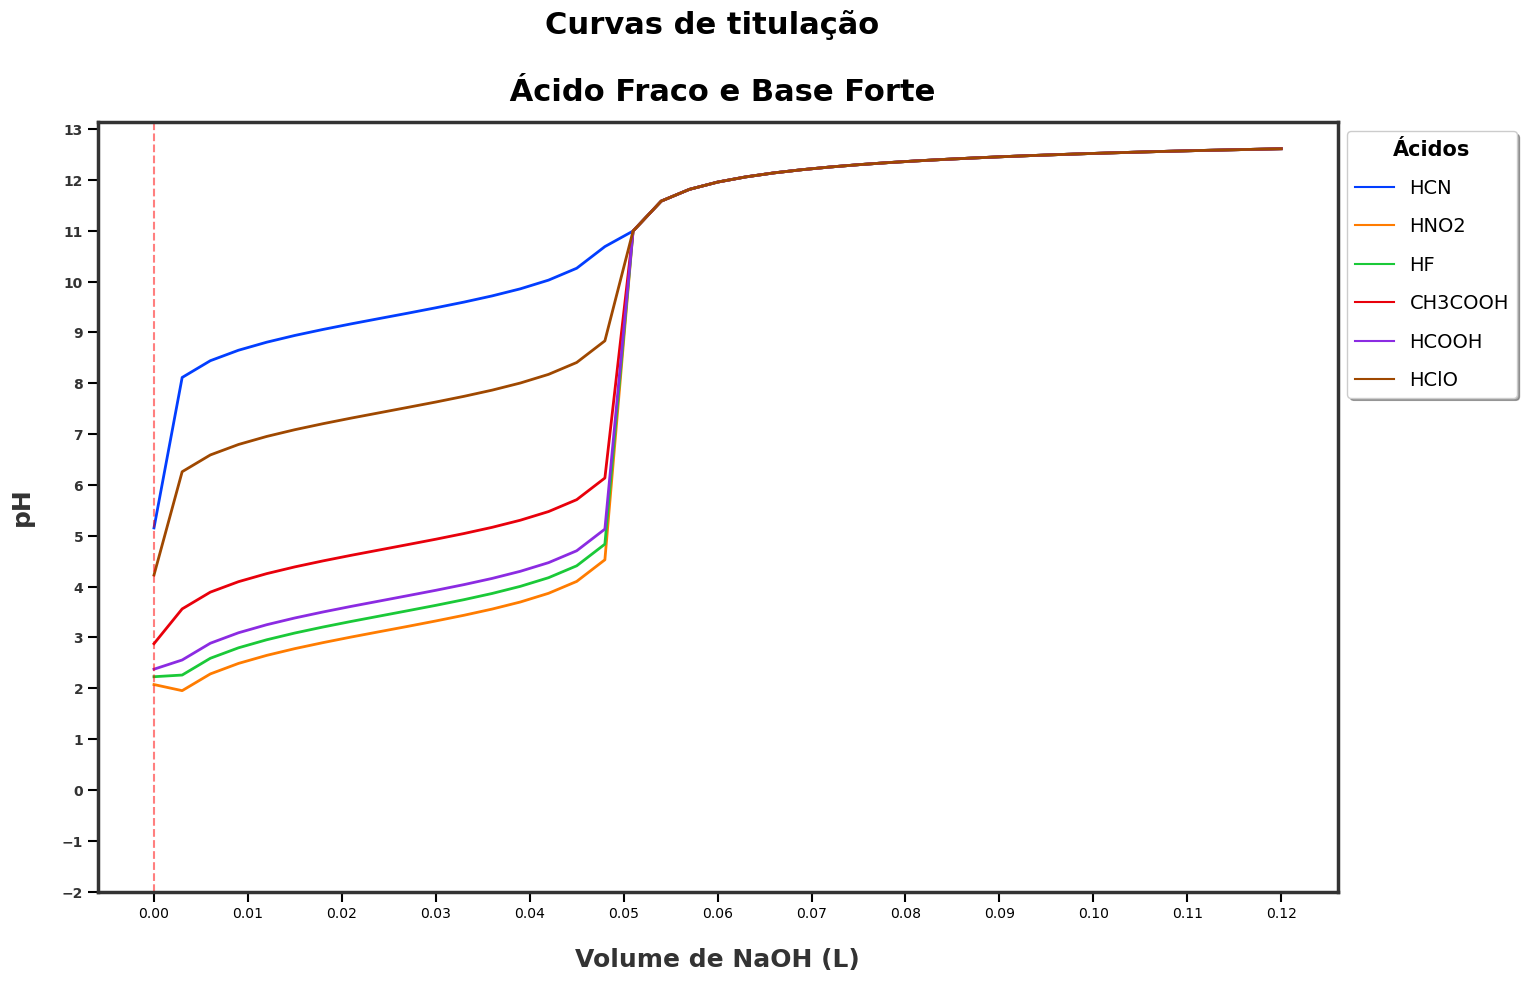

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

#for index, row in df_acidos_fracos.iterrows():
#    df_dados = df_resultados.loc[(df_resultados["Acido"] == row["Acidos"])]
#    sns.lineplot(data = df_dados, x = "Volume", y = "pH", hue="Acido", palette="deep")

df_dados = df_resultados.loc[(df_resultados["Acido"] == "H3PO43") | 
                             (df_resultados["Acido"] == "HNO2") | 
                             (df_resultados["Acido"] == "HF") |
                             (df_resultados["Acido"] == "CH3COOH") |
                             (df_resultados["Acido"] == "H2CO3") | (df_resultados["Acido"] == "H2S") ]
sns.lineplot(data = df_resultados, 
             x = "Volume",
             y = "pH",
             hue="Acido", 
             palette="bright",
             linewidth = 2, markevery=[0.01])

# Spines -> as linhas dos eixos
for axis in ['bottom', 'left', 'top', 'right']:
    ax.spines[axis].set_linewidth(2.5)
    ax.spines[axis].set_color('0.2')

# Ticks
ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_ticks(np.arange(0, 0.13, 0.01))

ax.yaxis.set_ticks_position('left')
ax.yaxis.set_ticks(np.arange(-2, 14, 1))

# Configurando ticks para os valores
# Tick -> linha nos pontos dos eixos
ax.tick_params(which = 'major',
               length = 7,
               grid_alpha = 0.5,
               width = 1.5)

# definição geral dos ticks do eixo y
plt.yticks(size = 10, weight = 'bold', color = '0.2')

ax.set_ylabel('pH', 
             fontsize = 18, weight = 'bold', 
             color = '0.2', labelpad = 20)
ax.set_xlabel('Volume de NaOH (L)', 
              fontsize = 18, weight = 'bold', 
              color = '0.2', labelpad = 20)

# Título do gráfico
ax.set_title("Curvas de titulação \n \n Ácido Fraco e Base Forte", 
             fontweight = 'bold', 
             fontsize = 22, 
             pad = 15)

sns.move_legend(ax, "upper left", 
                bbox_to_anchor=(1, 1),
                fancybox = True,
                shadow = True,
                fontsize = 14,
                title = "Ácidos",
                title_fontsize = 15,
                title_fontweight = 'bold',
                labelspacing = 1)

plt.axvline(0, color='r', ls="--", alpha=0.5)
#plt.axhline(7, color='r', ls="--", alpha=0.5)

#texto = "P.E."
#ax.text(0.052, 9.0, texto, color='red', horizontalalignment='center', verticalalignment='center', fontweight='bold')

# Salvando gráfico
plt.savefig('curvas_de_titulacao_ac_fraco_e_base_forte.png', bbox_inches = 'tight', dpi =250, facecolor = ax.get_facecolor())

# Exibindo o gráfico
plt.show()

<h2>Ácido acético -  $CH_{3}COOH$</h2>

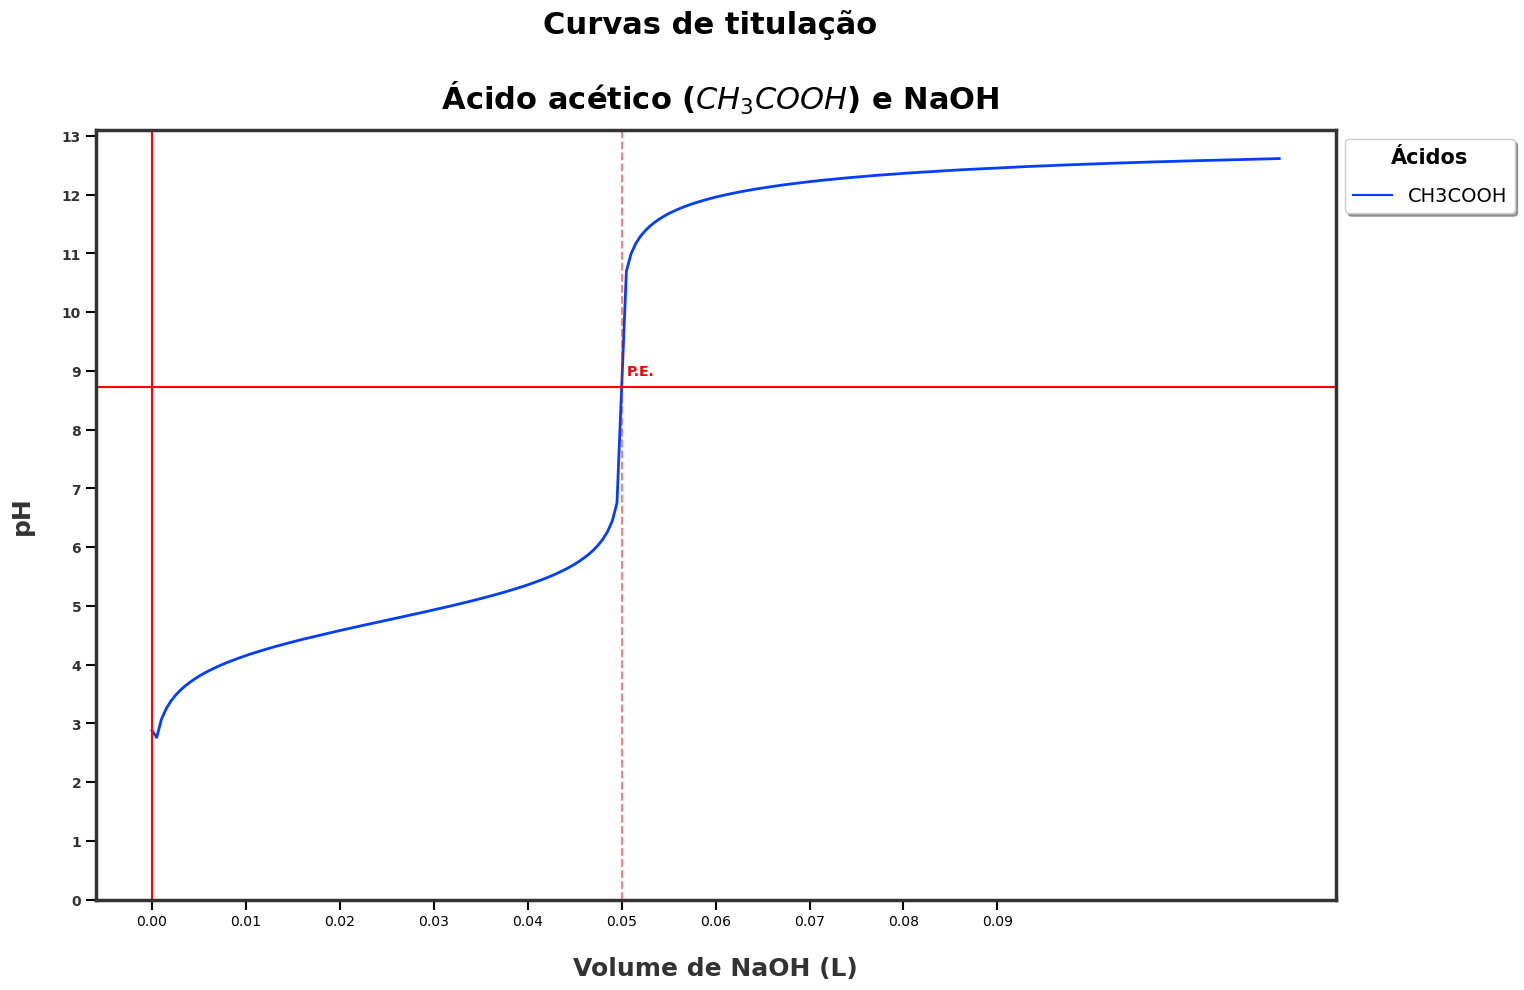

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

df_dados = df_resultados.loc[(df_resultados["Acido"] == "CH3COOH")]
sns.lineplot(data = df_dados, 
             x = "Volume",
             y = "pH",
             hue="Acido", 
             palette="bright",
             linewidth = 2)

# Spines -> as linhas dos eixos
for axis in ['bottom', 'left', 'top', 'right']:
    ax.spines[axis].set_linewidth(2.5)
    ax.spines[axis].set_color('0.2')

# Ticks
ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_ticks(np.arange(0, 0.10, 0.01))

ax.yaxis.set_ticks_position('left')
ax.yaxis.set_ticks(np.arange(0, 14, 1))

# Configurando ticks para os valores
# Tick -> linha nos pontos dos eixos
ax.tick_params(which = 'major',
               length = 7,
               grid_alpha = 0.5,
               width = 1.5)

# definição geral dos ticks do eixo y
plt.yticks(size = 10, weight = 'bold', color = '0.2')

ax.set_ylabel('pH', 
             fontsize = 18, weight = 'bold', 
             color = '0.2', labelpad = 20)
ax.set_xlabel('Volume de NaOH (L)', 
              fontsize = 18, weight = 'bold', 
              color = '0.2', labelpad = 20)

# Título do gráfico
ax.set_title("Curvas de titulação \n \n Ácido acético ($CH_{3}COOH$) e NaOH", 
             fontweight = 'bold', 
             fontsize = 22, 
             pad = 15)

sns.move_legend(ax, "upper left", 
                bbox_to_anchor=(1, 1),
                fancybox = True,
                shadow = True,
                fontsize = 14,
                title = "Ácidos",
                title_fontsize = 15,
                title_fontweight = 'bold',
                labelspacing = 1)

plt.axvline(0, color='r')
plt.axhline(8.728, color='r')
plt.axvline(0.05, color='r', ls="--", alpha=0.5)

texto = "P.E."
ax.text(0.052, 9.0, texto, color='red', horizontalalignment='center', verticalalignment='center', fontweight='bold')

# Salvando gráfico
plt.savefig('curvas_de_titulacao_ac_acetico.png', bbox_inches = 'tight', dpi =250, facecolor = ax.get_facecolor())

# Exibindo o gráfico
plt.show()

<h2>Ácido fosfórico - $H_{3}PO_{4}$</h2>

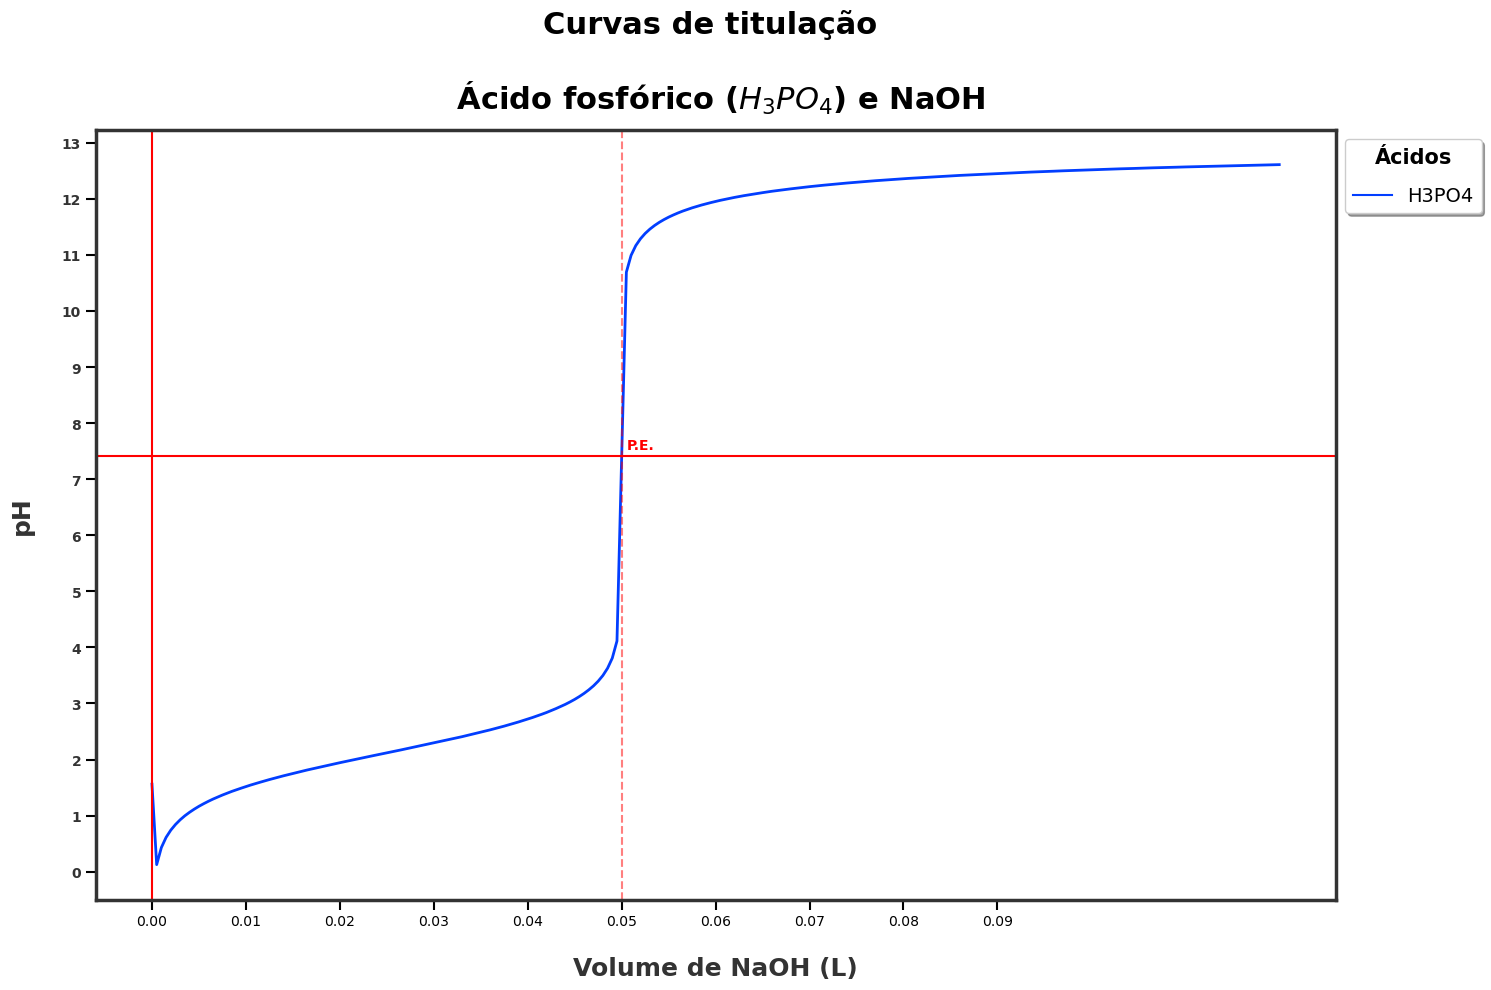

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

df_dados = df_resultados.loc[(df_resultados["Acido"] == "H3PO4")]
sns.lineplot(data = df_dados, 
             x = "Volume",
             y = "pH",
             hue="Acido", 
             palette="bright",
             linewidth = 2)

# Spines -> as linhas dos eixos
for axis in ['bottom', 'left', 'top', 'right']:
    ax.spines[axis].set_linewidth(2.5)
    ax.spines[axis].set_color('0.2')

# Ticks
ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_ticks(np.arange(0, 0.10, 0.01))

ax.yaxis.set_ticks_position('left')
ax.yaxis.set_ticks(np.arange(0, 14, 1))

# Configurando ticks para os valores
# Tick -> linha nos pontos dos eixos
ax.tick_params(which = 'major',
               length = 7,
               grid_alpha = 0.5,
               width = 1.5)

# definição geral dos ticks do eixo y
plt.yticks(size = 10, weight = 'bold', color = '0.2')

ax.set_ylabel('pH', 
             fontsize = 18, weight = 'bold', 
             color = '0.2', labelpad = 20)
ax.set_xlabel('Volume de NaOH (L)', 
              fontsize = 18, weight = 'bold', 
              color = '0.2', labelpad = 20)

# Título do gráfico
ax.set_title("Curvas de titulação \n \n Ácido fosfórico ($H_{3}PO_{4}$) e NaOH", 
             fontweight = 'bold', 
             fontsize = 22, 
             pad = 15)

sns.move_legend(ax, "upper left", 
                bbox_to_anchor=(1, 1),
                fancybox = True,
                shadow = True,
                fontsize = 14,
                title = "Ácidos",
                title_fontsize = 15,
                title_fontweight = 'bold',
                labelspacing = 1)

plt.axvline(0, color='r')
plt.axvline(0.05, color='r', ls="--", alpha=0.5)
plt.axhline(7.409, color='r')

texto = "P.E."
ax.text(0.052, 7.60, texto, color='red', horizontalalignment='center', verticalalignment='center', fontweight='bold')

# Salvando gráfico
plt.savefig('curva_de_titulacao_ac_forforico.png', bbox_inches = 'tight', dpi =250, facecolor = ax.get_facecolor())

# Exibindo o gráfico
plt.show()